<a href="https://colab.research.google.com/github/noctxrne/ICT-Notes/blob/main/06_Database_SQL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Database**

## **Types:**

1.   Relational database
2.   Object-Oriented databse
3.   Distributed databases
4.   Data warehouse
5.   NoSQL databases



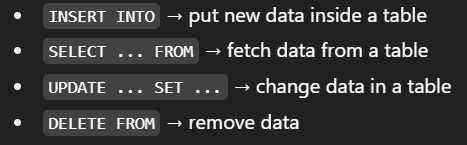

# **SQL** - Structured Query Language

In [ ]:
import sqlite3
conn=sqlite3.connect("students.db")
cursor=conn.cursor()

In [ ]:
cursor.execute("""CREATE TABLE IF NOT EXISTS students(
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    age INTEGER,
    gender TEXT,
    grade TEXT
    )
""")

In [ ]:
cursor.execute("insert into students(name,age,gender,grade) values('Sreesanth',21,'M','A+')")
cursor.execute("insert into students(name,age,gender,grade) values('Aryan','22','M','B+')")
cursor.execute("insert into students(name,age,gender,grade) values('Nikhil','25','M','C+')")
cursor.execute("insert into students(name,age,gender,grade) values('XXX','13','M','C+')")


In [ ]:
conn.commit()

In [ ]:
cursor.execute("select*from students")

In [ ]:
rows=cursor.fetchall()

In [ ]:
for row in rows:
  print("ID:",row[0],"name:",row[1],"age: ",row[2],"gender: ",row[3],"grade: ",row[4])

ID: 1 name: Sreesanth age:  21 gender:  M grade:  A+
ID: 2 name: Aryan age:  22 gender:  M grade:  B+
ID: 3 name: Nikhil age:  25 gender:  M grade:  C+
ID: 4 name: XXX age:  13 gender:  M grade:  C+


In [ ]:
#print students whose gender is M
cursor.execute("select*from students where gender='M' ")
cursor.fetchall()

[(1, 'Sreesanth', 21, 'M', 'A+'),
 (2, 'Aryan', 22, 'M', 'B+'),
 (3, 'Nikhil', 25, 'M', 'C+'),
 (4, 'XXX', 13, 'M', 'C+')]

In [ ]:
#print average of age of students
cursor.execute("select avg(age) from students")
cursor.fetchall()

[(20.25,)]

In [ ]:
#print students age in ascending order but limited to 3
cursor.execute("select*from students order by age,name limit 3 ")
print(cursor.fetchall())

[(4, 'XXX', 13, 'M', 'C+'), (1, 'Sreesanth', 21, 'M', 'A+'), (2, 'Aryan', 22, 'M', 'B+')]


In [ ]:
#Modifying table to add a colum named mark and datatype integer
cursor.execute('alter table students add column mark integer')
conn.commit()

In [ ]:
#Updating student of id=2 and set marks=450
cursor.execute('update students set mark=450 where id = 2')
conn.commit()

In [ ]:
#Printing the
cursor.execute("select * from students")
print(cursor.fetchall())

[(1, 'Sreesanth', 21, 'M', 'A+', None), (2, 'Aryan', 22, 'M', 'B+', 450), (3, 'Nikhil', 25, 'M', 'C+', None), (4, 'XXX', 13, 'M', 'C+', None)]


# **Movies**

In [ ]:
import sqlite3

# Connect to database (creates if not exists)
conn=sqlite3.connect("movies.db")
c=conn.cursor()

In [ ]:
# Create table (only if it doesn't exist already)
c.execute('''
CREATE TABLE IF NOT EXISTS movies (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    movie_name TEXT,
    director_name TEXT,
    country TEXT,
    imdb_rating REAL,
    box_office_collection INTEGER
)
''')

In [ ]:
# Insert some movie records
c.execute("INSERT INTO movies(movie_name,director_name,country,imdb_rating,box_office_collection) VALUES('Inception','Christopher Nolan','USA',8.8,829895144)")
c.execute("INSERT INTO movies(movie_name,director_name,country,imdb_rating,box_office_collection) VALUES('Parasite','Bong Joon-ho','South Korea',8.6,263500000)")
c.execute("INSERT INTO movies(movie_name,director_name,country,imdb_rating,box_office_collection) VALUES('Arrival','Denis Villeneuve','USA',7.9,203000000)")
c.execute("INSERT INTO movies(movie_name,director_name,country,imdb_rating,box_office_collection) VALUES('Primer','Shane Carruth','USA',6.9,84152)")
c.execute("INSERT INTO movies(movie_name,director_name,country,imdb_rating,box_office_collection) VALUES('Wake Up Sid','Ayan Mukerji','India',7.6,14000000)")
c.execute("INSERT INTO movies(movie_name,director_name,country,imdb_rating,box_office_collection) VALUES('Tu Hai Mera Sunday','Milind Dhaimade','India',7.8,300000)")
c.execute("INSERT INTO movies(movie_name,director_name,country,imdb_rating,box_office_collection) VALUES('The Dark Knight','Christopher Nolan','USA',9.0,1004558444)")
conn.commit()

In [ ]:
# Print all movies
c.execute("SELECT * FROM movies")
rows = c.fetchall()
for row in rows:
    print("ID:", row[0], "Movie:", row[1], "Director:", row[2], "Country:", row[3], "IMDB:", row[4], "Box Office:", row[5])


ID: 1 Movie: Inception Director: Christopher Nolan Country: USA IMDB: 8.8 Box Office: 829895144
ID: 2 Movie: Parasite Director: Bong Joon-ho Country: South Korea IMDB: 8.6 Box Office: 263500000
ID: 3 Movie: Arrival Director: Denis Villeneuve Country: USA IMDB: 7.9 Box Office: 203000000
ID: 4 Movie: Primer Director: Shane Carruth Country: USA IMDB: 6.9 Box Office: 84152
ID: 5 Movie: Wake Up Sid Director: Ayan Mukerji Country: India IMDB: 7.6 Box Office: 14000000
ID: 6 Movie: Tu Hai Mera Sunday Director: Milind Dhaimade Country: India IMDB: 7.8 Box Office: 300000
ID: 7 Movie: The Dark Knight Director: Christopher Nolan Country: USA IMDB: 9.0 Box Office: 1004558444


In [ ]:
# Print movies with IMDB rating above 8.5
c.execute("SELECT * FROM movies WHERE imdb_rating > 8.5")
print("Movies with IMDB > 8.5:\n", c.fetchall())

Movies with IMDB > 8.5:
 [(1, 'Inception', 'Christopher Nolan', 'USA', 8.8, 829895144), (2, 'Parasite', 'Bong Joon-ho', 'South Korea', 8.6, 263500000), (7, 'The Dark Knight', 'Christopher Nolan', 'USA', 9.0, 1004558444)]


In [ ]:
# Print average IMDB rating
c.execute("SELECT AVG(imdb_rating) FROM movies")
print("\nAverage IMDB Rating:", c.fetchall())


Average IMDB Rating: [(8.085714285714285,)]


In [ ]:
#Modification
# Add a new column for Release Year
c.execute("ALTER TABLE movies ADD COLUMN release_year INTEGER")
conn.commit()
# Update movie with id=2 to set release year
c.execute("UPDATE movies SET release_year=2019 WHERE id=2")
conn.commit()

In [ ]:
release_years = {
    "Inception": 2010,
    "Parasite": 2019,
    "Arrival": 2016,
    "Primer": 2004,
    "Wake Up Sid": 2009,
    "Tu Hai Mera Sunday": 2016,
    "The Dark Knight": 2008
}

for movie, year in release_years.items():
    c.execute("UPDATE movies SET release_year=? WHERE movie_name=?", (year, movie))

conn.commit()


In [ ]:
# Final table view
c.execute("SELECT * FROM movies")
print("\nFinal Movies Table:", c.fetchall())


Final Movies Table: [(1, 'Inception', 'Christopher Nolan', 'USA', 8.8, 829895144, 2010), (2, 'Parasite', 'Bong Joon-ho', 'South Korea', 8.6, 263500000, 2019), (3, 'Arrival', 'Denis Villeneuve', 'USA', 7.9, 203000000, 2016), (4, 'Primer', 'Shane Carruth', 'USA', 6.9, 84152, 2004), (5, 'Wake Up Sid', 'Ayan Mukerji', 'India', 7.6, 14000000, 2009), (6, 'Tu Hai Mera Sunday', 'Milind Dhaimade', 'India', 7.8, 300000, 2016), (7, 'The Dark Knight', 'Christopher Nolan', 'USA', 9.0, 1004558444, 2008)]
